## Initialize spark and read data

In [1]:
import pyspark as ps

sc = ps.SparkContext.getOrCreate()
print(sc)
print(sc.version)

24/05/19 22:46:15 WARN Utils: Your hostname, Rafaels-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.224 instead (on interface en0)
24/05/19 22:46:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/19 22:46:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/19 22:46:17 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


<SparkContext master=local[*] appName=pyspark-shell>
3.5.1


In [3]:
#import SparkSeccion pyspark.sql
from pyspark.sql import SparkSession

#Create my_spark
spark = SparkSession.builder.getOrCreate()

#print my_spark
print(spark)

24/05/19 23:07:02 WARN Utils: Your hostname, Rafaels-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.224 instead (on interface en0)
24/05/19 23:07:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/19 23:07:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/19 23:07:05 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
file_path = 'CHARTEVENTS.csv'

#Read in the airports path
df_events = spark.read.csv(file_path, header=True)
df_icu = spark.read.csv('ICUSTAYS.csv', header=True)
df_diag = spark.read.csv('D_ICD_DIAGNOSES.csv', header=True)

In [5]:
#!pip install pandas


In [6]:
#import pyspark.pandas as ps

# Convert Spark DataFrames to Pandas-on-Spark DataFrames
#psdf_events = df_events.pandas_api()
#psdf_icu = df_icu.pandas_api()
#psdf_diag = df_diag.pandas_api()


In [7]:
df_events.printSchema()
df_icu.printSchema()
df_diag.printSchema()


root
 |-- ROW_ID: string (nullable = true)
 |-- SUBJECT_ID: string (nullable = true)
 |-- HADM_ID: string (nullable = true)
 |-- ICUSTAY_ID: string (nullable = true)
 |-- ITEMID: string (nullable = true)
 |-- CHARTTIME: string (nullable = true)
 |-- STORETIME: string (nullable = true)
 |-- CGID: string (nullable = true)
 |-- VALUE: string (nullable = true)
 |-- VALUENUM: string (nullable = true)
 |-- VALUEUOM: string (nullable = true)
 |-- WARNING: string (nullable = true)
 |-- ERROR: string (nullable = true)
 |-- RESULTSTATUS: string (nullable = true)
 |-- STOPPED: string (nullable = true)

root
 |-- ROW_ID: string (nullable = true)
 |-- SUBJECT_ID: string (nullable = true)
 |-- HADM_ID: string (nullable = true)
 |-- ICUSTAY_ID: string (nullable = true)
 |-- DBSOURCE: string (nullable = true)
 |-- FIRST_CAREUNIT: string (nullable = true)
 |-- LAST_CAREUNIT: string (nullable = true)
 |-- FIRST_WARDID: string (nullable = true)
 |-- LAST_WARDID: string (nullable = true)
 |-- INTIME: stri

In [8]:
df_events.show(10)
df_diag.show(10)
df_icu.show(10)

+------+----------+-------+----------+------+-------------------+-------------------+-----+-----+--------+--------+-------+-----+------------+-------+
|ROW_ID|SUBJECT_ID|HADM_ID|ICUSTAY_ID|ITEMID|          CHARTTIME|          STORETIME| CGID|VALUE|VALUENUM|VALUEUOM|WARNING|ERROR|RESULTSTATUS|STOPPED|
+------+----------+-------+----------+------+-------------------+-------------------+-----+-----+--------+--------+-------+-----+------------+-------+
|   788|        36| 165660|    241249|223834|2134-05-12 12:00:00|2134-05-12 13:56:00|17525|   15|      15|   L/min|      0|    0|        NULL|   NULL|
|   789|        36| 165660|    241249|223835|2134-05-12 12:00:00|2134-05-12 13:56:00|17525|  100|     100|    NULL|      0|    0|        NULL|   NULL|
|   790|        36| 165660|    241249|224328|2134-05-12 12:00:00|2134-05-12 12:18:00|20823|  .37|     .37|    NULL|      0|    0|        NULL|   NULL|
|   791|        36| 165660|    241249|224329|2134-05-12 12:00:00|2134-05-12 12:19:00|20823|   

In [9]:
row_count = df_events.count()
print(f'Number of rows: {row_count}')

Number of rows: 39195630


## Data visualization

In [13]:
# Filter relevant columns and rows
# Filter and select relevant columns from events DataFrame
filtered_events_df = df_events.select('SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME', 'VALUENUM')

# Select relevant columns from ICU stays DataFrame
selected_icu_df = df_icu.select('SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'LOS')

# Show a few rows to verify
filtered_events_df.show(5)
selected_icu_df.show(5)


# Perform the join between events and ICU stays on 'SUBJECT_ID', 'HADM_ID', and 'ICUSTAY_ID'
joined_df = filtered_events_df.join(selected_icu_df, on=['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID'], how='inner')

# Show the first few rows of the joined DataFrame
joined_df.show(5)


+----------+-------+----------+------+-------------------+--------+
|SUBJECT_ID|HADM_ID|ICUSTAY_ID|ITEMID|          CHARTTIME|VALUENUM|
+----------+-------+----------+------+-------------------+--------+
|        36| 165660|    241249|223834|2134-05-12 12:00:00|      15|
|        36| 165660|    241249|223835|2134-05-12 12:00:00|     100|
|        36| 165660|    241249|224328|2134-05-12 12:00:00|     .37|
|        36| 165660|    241249|224329|2134-05-12 12:00:00|       6|
|        36| 165660|    241249|224330|2134-05-12 12:00:00|     2.5|
+----------+-------+----------+------+-------------------+--------+
only showing top 5 rows

+----------+-------+----------+------+
|SUBJECT_ID|HADM_ID|ICUSTAY_ID|   LOS|
+----------+-------+----------+------+
|       268| 110404|    280836| 3.249|
|       269| 106296|    206613|3.2788|
|       270| 188028|    220345|2.8939|
|       271| 173727|    249196|  2.06|
|       272| 164716|    210407|1.6202|
+----------+-------+----------+------+
only showing

+----------+-------+----------+------+-------------------+--------+------+
|SUBJECT_ID|HADM_ID|ICUSTAY_ID|ITEMID|          CHARTTIME|VALUENUM|   LOS|
+----------+-------+----------+------+-------------------+--------+------+
|        36| 165660|    241249|223834|2134-05-12 12:00:00|      15|4.3483|
|        36| 165660|    241249|223835|2134-05-12 12:00:00|     100|4.3483|
|        36| 165660|    241249|224328|2134-05-12 12:00:00|     .37|4.3483|
|        36| 165660|    241249|224329|2134-05-12 12:00:00|       6|4.3483|
|        36| 165660|    241249|224330|2134-05-12 12:00:00|     2.5|4.3483|
+----------+-------+----------+------+-------------------+--------+------+
only showing top 5 rows



In [14]:
import pyspark.sql.functions as F

# Calculate basic statistics for VALUENUM by SUBJECT_ID
stats_df = joined_df.groupBy('SUBJECT_ID').agg(
    F.count('VALUENUM').alias('event_count'),
    F.mean('VALUENUM').alias('mean_value'),
    F.stddev('VALUENUM').alias('stddev_value')
)

# Show the statistics DataFrame
stats_df.show(5)


+----------+-----------+------------------+------------------+
|SUBJECT_ID|event_count|        mean_value|      stddev_value|
+----------+-----------+------------------+------------------+
|      9030|       1205| 89.65335269709539| 272.9160685503319|
|     11722|        841|127.07944114149821|1321.3974492445655|
|     11236|       6409| 65.81271025120934| 133.6048880904588|
|      3949|        186| 81.56166666666667|312.58699455216174|
|      5913|        188| 69.47664893617022|36.310294321818134|
+----------+-----------+------------------+------------------+
only showing top 5 rows



Matplotlib is building the font cache; this may take a moment.


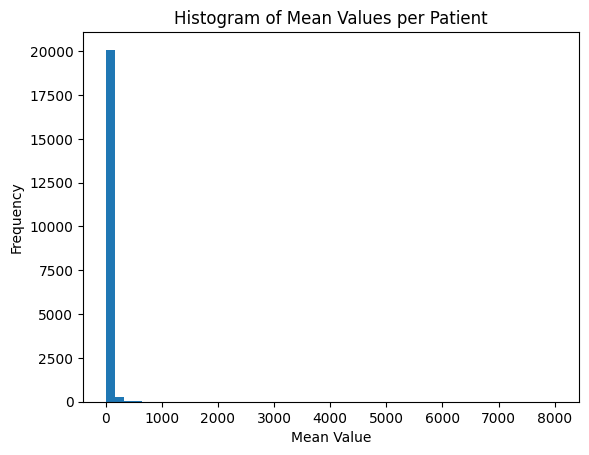

In [17]:
# Visualization using matplotlib (run this in a Jupyter Notebook) VISUALIZAÇÃO DE MERDA!!!!
import matplotlib.pyplot as plt
import pandas as pd

# Convert to Pandas DataFrame for plotting
stats_pd_df = stats_df.toPandas()

# Plot histogram of mean values
plt.hist(stats_pd_df['mean_value'], bins=50)
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Values per Patient')
plt.show()


In [18]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Feature engineering
assembler = VectorAssembler(
    inputCols=['event_count', 'mean_value', 'stddev_value'],
    outputCol='features'
)
features_df = assembler.transform(stats_df)

# Join features with ICU stays to get the LOS
model_df = features_df.join(selected_icu_df.select('SUBJECT_ID', 'LOS'), on='SUBJECT_ID')

# Convert LOS to float
model_df = model_df.withColumn("LOS", model_df["LOS"].cast("float"))

# Train/test split
train_df, test_df = model_df.randomSplit([0.8, 0.2], seed=42)

# Train a linear regression model
lr = LinearRegression(featuresCol='features', labelCol='LOS')
lr_model = lr.fit(train_df)

# Evaluate the model
predictions = lr_model.transform(test_df)
predictions.select('LOS', 'prediction').show(10)


24/05/19 23:32:18 WARN Instrumentation: [093b0c3d] regParam is zero, which might cause numerical instability and overfitting.
24/05/19 23:32:19 ERROR Executor: Exception in task 0.0 in stage 28.0 (TID 176)]
org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`VectorAssembler$$Lambda$4137/0x0000000801c79a68`: (struct<event_count_double_VectorAssembler_c7372fff3498:double,mean_value:double,stddev_value:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage4.hashAgg_doAggregateWithKeysOutput_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator

Py4JJavaError: An error occurred while calling o157.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 28.0 failed 1 times, most recent failure: Lost task 0.0 in stage 28.0 (TID 176) (192.168.1.224 executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`VectorAssembler$$Lambda$4137/0x0000000801c79a68`: (struct<event_count_double_VectorAssembler_c7372fff3498:double,mean_value:double,stddev_value:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage4.hashAgg_doAggregateWithKeysOutput_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage4.sort_addToSorter_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage4.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at scala.collection.TraversableOnce.aggregate(TraversableOnce.scala:260)
	at scala.collection.TraversableOnce.aggregate$(TraversableOnce.scala:260)
	at scala.collection.AbstractIterator.aggregate(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$4(RDD.scala:1264)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$6(RDD.scala:1265)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 35 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2493)
	at org.apache.spark.rdd.RDD.$anonfun$fold$1(RDD.scala:1202)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.fold(RDD.scala:1196)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$2(RDD.scala:1289)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1256)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$1(RDD.scala:1242)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1242)
	at org.apache.spark.ml.optim.WeightedLeastSquares.fit(WeightedLeastSquares.scala:107)
	at org.apache.spark.ml.regression.LinearRegression.trainWithNormal(LinearRegression.scala:456)
	at org.apache.spark.ml.regression.LinearRegression.$anonfun$train$1(LinearRegression.scala:354)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.regression.LinearRegression.train(LinearRegression.scala:329)
	at org.apache.spark.ml.regression.LinearRegression.train(LinearRegression.scala:186)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:114)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:78)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`VectorAssembler$$Lambda$4137/0x0000000801c79a68`: (struct<event_count_double_VectorAssembler_c7372fff3498:double,mean_value:double,stddev_value:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage4.hashAgg_doAggregateWithKeysOutput_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage4.sort_addToSorter_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage4.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at scala.collection.TraversableOnce.aggregate(TraversableOnce.scala:260)
	at scala.collection.TraversableOnce.aggregate$(TraversableOnce.scala:260)
	at scala.collection.AbstractIterator.aggregate(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$4(RDD.scala:1264)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$6(RDD.scala:1265)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 35 more


# AGREGATION!!

In [19]:
import pyspark.sql.functions as F
from pyspark.sql import Window

# Aggregate measurements for each SUBJECT_ID and CHARTTIME
windowSpec = Window.partitionBy("SUBJECT_ID").orderBy("CHARTTIME")

aggregated_events_df = df_events.withColumn("mean_value", F.mean("VALUENUM").over(windowSpec)) \
                                .withColumn("stddev_value", F.stddev("VALUENUM").over(windowSpec)) \
                                .withColumn("min_value", F.min("VALUENUM").over(windowSpec)) \
                                .withColumn("max_value", F.max("VALUENUM").over(windowSpec)) \
                                .withColumn("count_value", F.count("VALUENUM").over(windowSpec)) \
                                .select("SUBJECT_ID", "CHARTTIME", "mean_value", "stddev_value", "min_value", "max_value", "count_value")

# Show the aggregated DataFrame
aggregated_events_df.show(5)


+----------+-------------------+------------------+-----------------+---------+------------------+-----------+
|SUBJECT_ID|          CHARTTIME|        mean_value|     stddev_value|min_value|         max_value|count_value|
+----------+-------------------+------------------+-----------------+---------+------------------+-----------+
|       101|2196-09-26 17:45:00|31.883956061469185|38.06275607345207|        1|98.400001525878906|          9|
|       101|2196-09-26 17:45:00|31.883956061469185|38.06275607345207|        1|98.400001525878906|          9|
|       101|2196-09-26 17:45:00|31.883956061469185|38.06275607345207|        1|98.400001525878906|          9|
|       101|2196-09-26 17:45:00|31.883956061469185|38.06275607345207|        1|98.400001525878906|          9|
|       101|2196-09-26 17:45:00|31.883956061469185|38.06275607345207|        1|98.400001525878906|          9|
+----------+-------------------+------------------+-----------------+---------+------------------+-----------+
o

In [21]:
# Filter for a specific patient (example SUBJECT_ID = 36)
patient_id = 36
patient_df = aggregated_events_df.filter(aggregated_events_df['SUBJECT_ID'] == patient_id).toPandas()

# Ensure CHARTTIME is in datetime format
patient_df['CHARTTIME'] = pd.to_datetime(patient_df['CHARTTIME'])


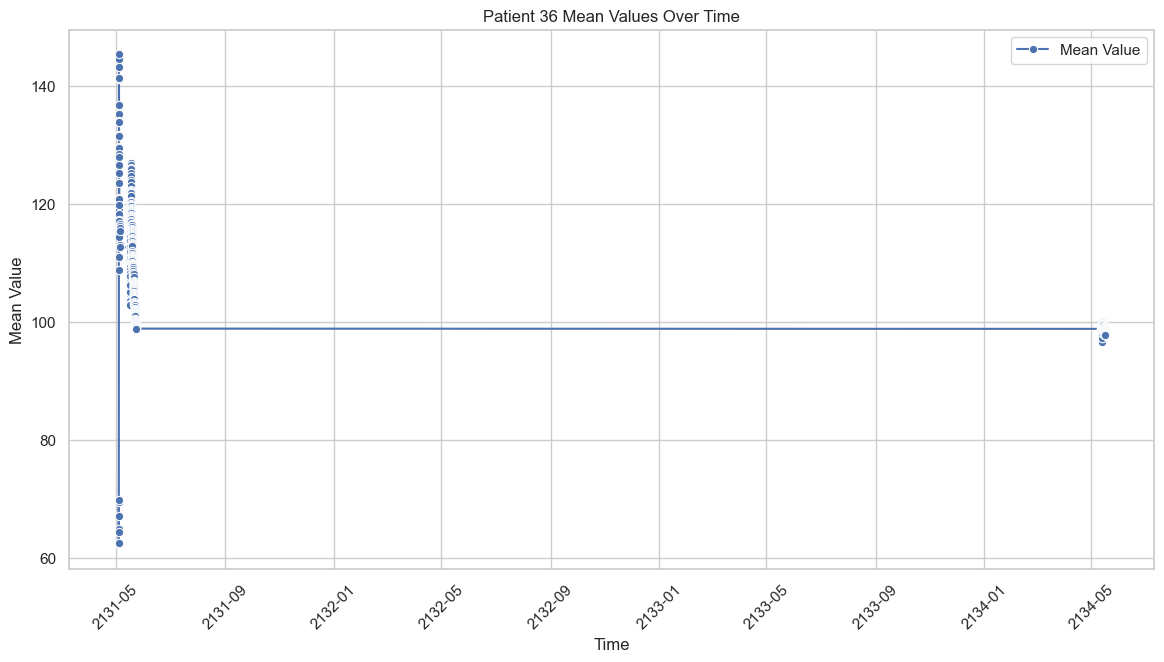

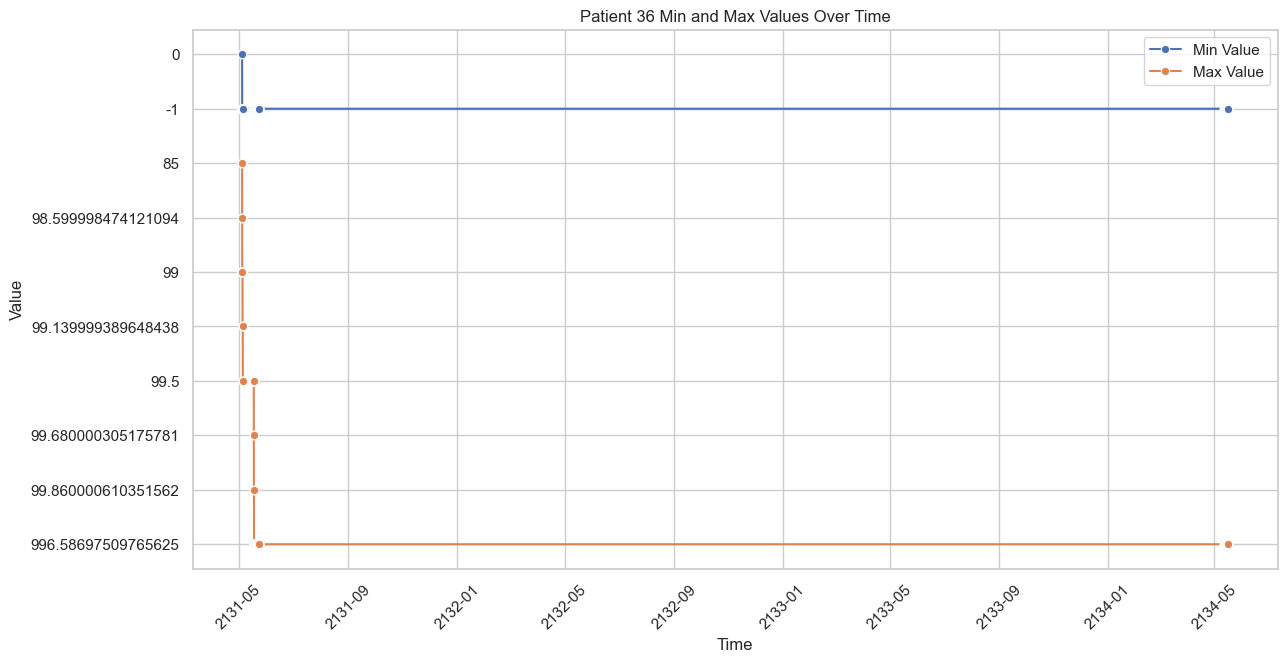

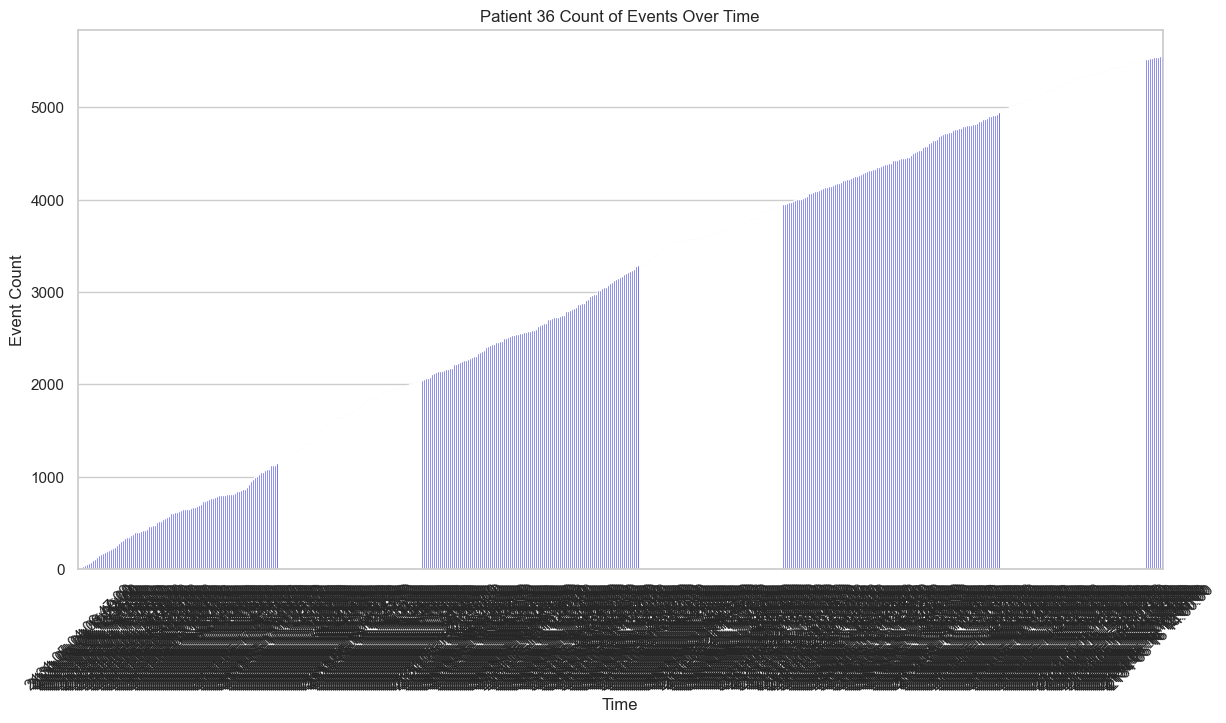

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the mean values over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='CHARTTIME', y='mean_value', data=patient_df, marker='o', label='Mean Value')
plt.title(f'Patient {patient_id} Mean Values Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot the min and max values over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='CHARTTIME', y='min_value', data=patient_df, marker='o', label='Min Value')
sns.lineplot(x='CHARTTIME', y='max_value', data=patient_df, marker='o', label='Max Value')
plt.title(f'Patient {patient_id} Min and Max Values Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot the count of events over time
plt.figure(figsize=(14, 7))
sns.barplot(x='CHARTTIME', y='count_value', data=patient_df, color='blue')
plt.title(f'Patient {patient_id} Count of Events Over Time')
plt.xlabel('Time')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.show()


# another approach?

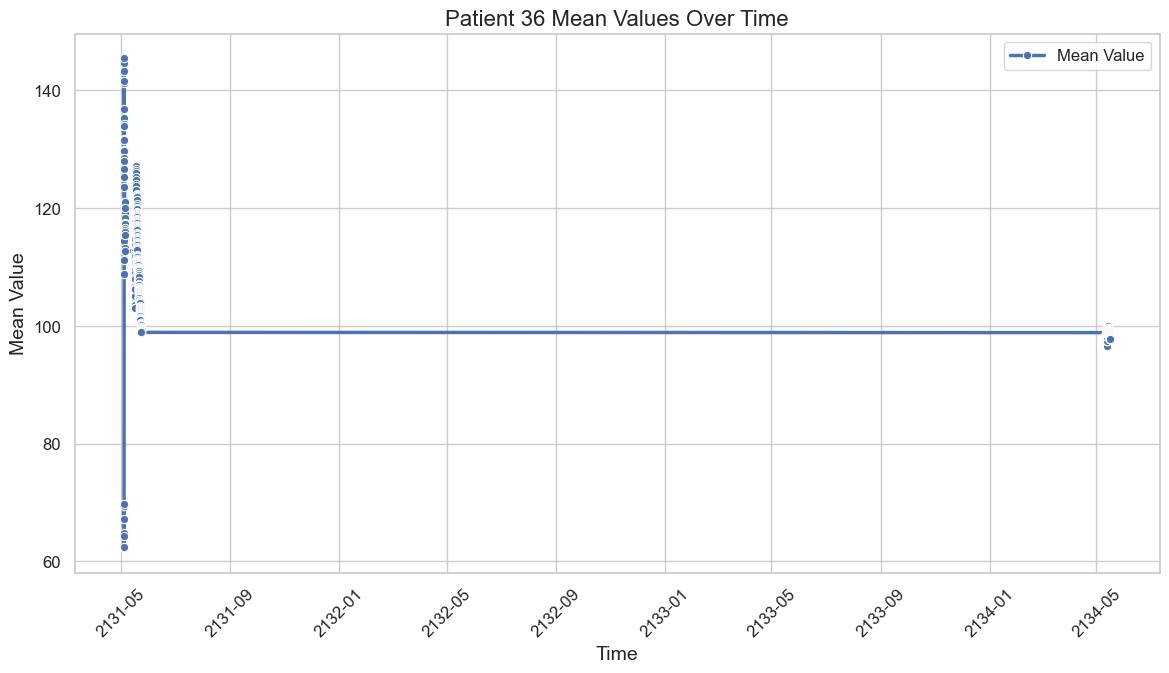

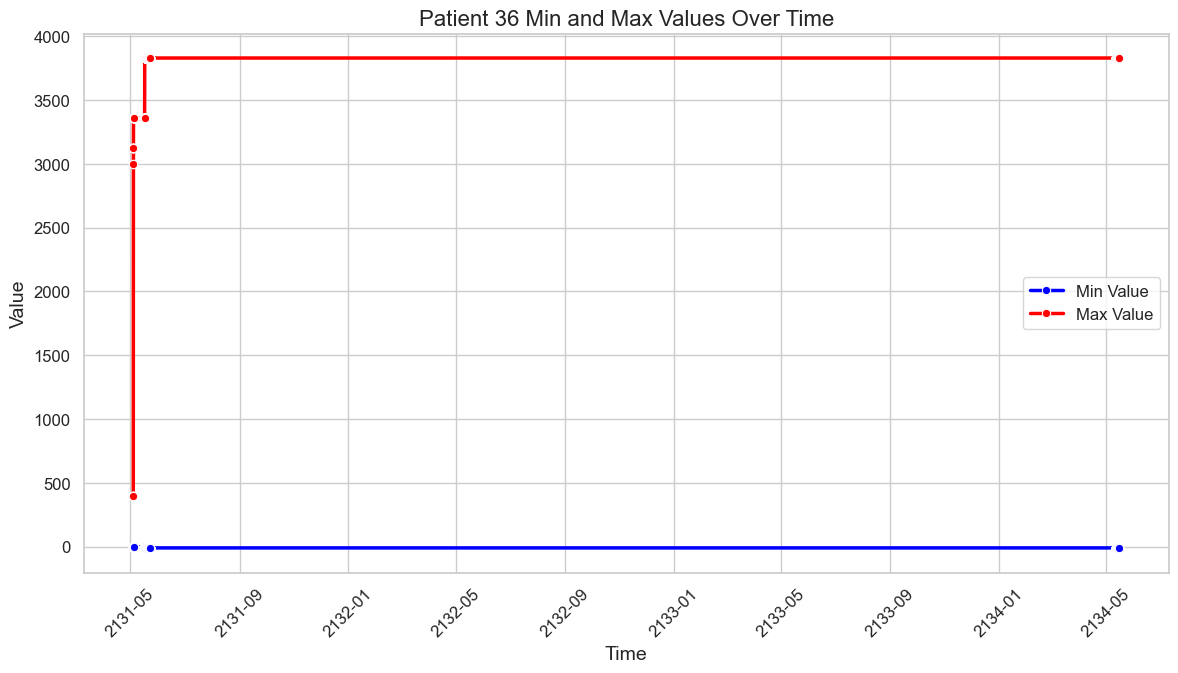

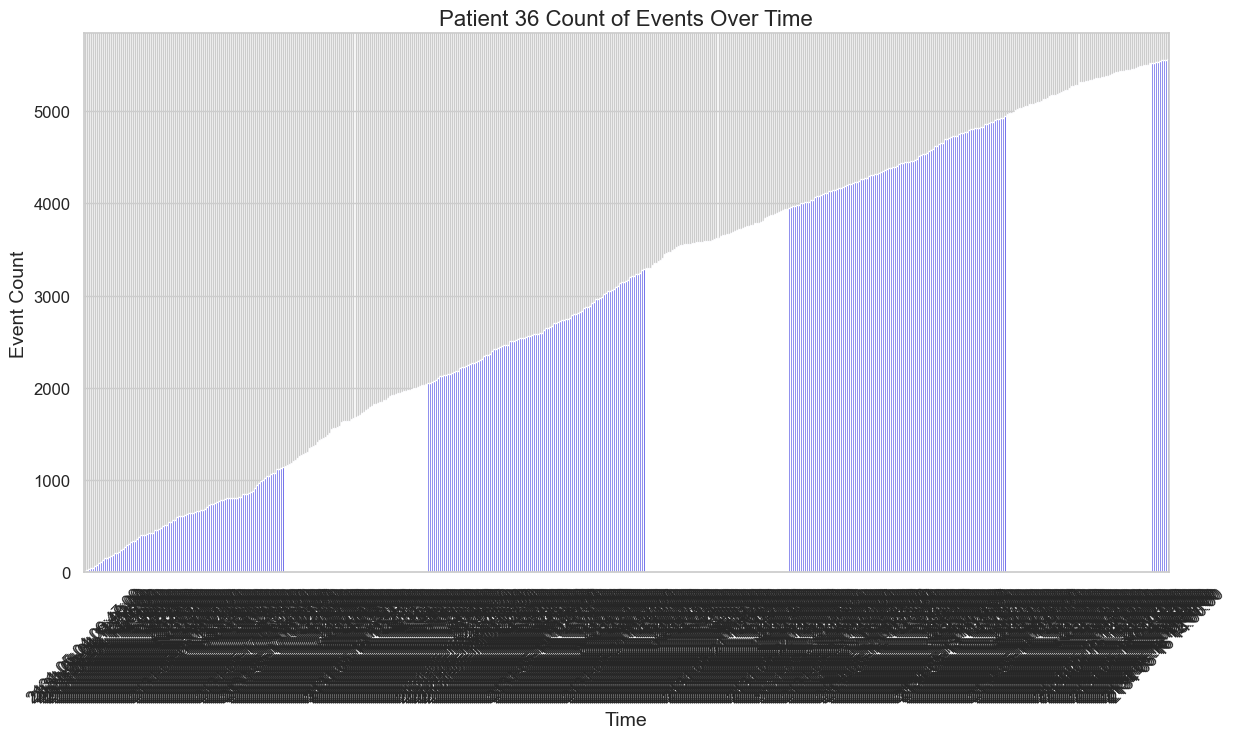

In [31]:
events_df = spark.read.csv('CHARTEVENTS.csv', header=True, inferSchema=True)
icu_df = spark.read.csv('ICUSTAYS.csv', header=True, inferSchema=True)
diag_df = spark.read.csv('D_ICD_DIAGNOSES.csv', header=True, inferSchema=True)

# Filter and select relevant columns from events DataFrame
filtered_events_df = events_df.select('SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME', 'VALUENUM')

# Aggregate measurements for each SUBJECT_ID and CHARTTIME
windowSpec = Window.partitionBy("SUBJECT_ID").orderBy("CHARTTIME")

aggregated_events_df = filtered_events_df.withColumn("mean_value", F.mean("VALUENUM").over(windowSpec)) \
                                         .withColumn("stddev_value", F.stddev("VALUENUM").over(windowSpec)) \
                                         .withColumn("min_value", F.min("VALUENUM").over(windowSpec)) \
                                         .withColumn("max_value", F.max("VALUENUM").over(windowSpec)) \
                                         .withColumn("count_value", F.count("VALUENUM").over(windowSpec)) \
                                         .select("SUBJECT_ID", "CHARTTIME", "mean_value", "stddev_value", "min_value", "max_value", "count_value")


# Convert to Pandas DataFrame for a specific patient (example SUBJECT_ID = 36)
patient_id = 36
patient_df = aggregated_events_df.filter(aggregated_events_df['SUBJECT_ID'] == patient_id).toPandas()

# Ensure CHARTTIME is in datetime format
patient_df['CHARTTIME'] = pd.to_datetime(patient_df['CHARTTIME'])

# Set the plot style
sns.set(style="whitegrid")

# Plot the mean values over time with improved aesthetics
plt.figure(figsize=(14, 7))
sns.lineplot(x='CHARTTIME', y='mean_value', data=patient_df, marker='o', label='Mean Value', linewidth=2.5)
plt.title(f'Patient {patient_id} Mean Values Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# Plot the min and max values over time with improved aesthetics
plt.figure(figsize=(14, 7))
sns.lineplot(x='CHARTTIME', y='min_value', data=patient_df, marker='o', label='Min Value', linewidth=2.5, color='blue')
sns.lineplot(x='CHARTTIME', y='max_value', data=patient_df, marker='o', label='Max Value', linewidth=2.5, color='red')
plt.title(f'Patient {patient_id} Min and Max Values Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# Plot the count of events over time with improved aesthetics
plt.figure(figsize=(14, 7))
sns.barplot(x='CHARTTIME', y='count_value', data=patient_df, color='blue')
plt.title(f'Patient {patient_id} Count of Events Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Event Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [32]:
# Select relevant columns from ICU stays DataFrame
selected_icu_df = icu_df.select('SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'LOS')

# Join the aggregated events data with ICU stays data
joined_df = aggregated_events_df.join(selected_icu_df, on=['SUBJECT_ID', 'ICUSTAY_ID'], how='inner')

# Show the joined DataFrame
joined_df.show(5)


AnalysisException: [UNRESOLVED_USING_COLUMN_FOR_JOIN] USING column `ICUSTAY_ID` cannot be resolved on the left side of the join. The left-side columns: [`CHARTTIME`, `SUBJECT_ID`, `count_value`, `max_value`, `mean_value`, `min_value`, `stddev_value`].

In [ ]:
# Ensure all necessary columns are present
required_columns = ['mean_value', 'stddev_value', 'min_value', 'max_value', 'count_value']
for col_name in required_columns:
    if col_name not in joined_df.columns:
        joined_df = joined_df.withColumn(col_name, F.lit(0))

# Handle null values by filling with 0
joined_df = joined_df.fillna({'mean_value': 0, 'stddev_value': 0, 'min_value': 0, 'max_value': 0, 'count_value': 0})

# Show the DataFrame after handling null values
joined_df.show(5)


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Feature engineering using VectorAssembler
assembler = VectorAssembler(
    inputCols=['mean_value', 'stddev_value', 'min_value', 'max_value', 'count_value'],
    outputCol='features'
)
features_df = assembler.transform(joined_df)

# Ensure LOS is of type float
features_df = features_df.withColumn("LOS", features_df["LOS"].cast("float"))

# Train/test split
train_df, test_df = features_df.randomSplit([0.8, 0.2], seed=42)

# Train a linear regression model
lr = LinearRegression(featuresCol='features', labelCol='LOS')
lr_model = lr.fit(train_df)

# Evaluate the model
predictions = lr_model.transform(test_df)
predictions.select('LOS', 'prediction').show(10)


In [29]:
model_df = model_df.fillna({'event_count': 0, 'mean_value': 0, 'stddev_value': 0, 'min_value': 0, 'max_value': 0, 'count_value': 0})

# Feature engineering using VectorAssembler
assembler = VectorAssembler(
    inputCols=['event_count', 'mean_value', 'stddev_value', 'min_value', 'max_value', 'count_value'],
    outputCol='features'
)
features_df = assembler.transform(model_df)

# Train/test split
train_df, test_df = features_df.randomSplit([0.8, 0.2], seed=42)

# Train a linear regression model
lr = LinearRegression(featuresCol='features', labelCol='LOS')
lr_model = lr.fit(train_df)

# Evaluate the model
predictions = lr_model.transform(test_df)
predictions.select('LOS', 'prediction').show(10)

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `min_value` cannot be resolved. Did you mean one of the following? [`SUBJECT_ID`, `event_count`, `mean_value`, `stddev_value`, `features`, `LOS`].